# Particle mesh

In [3]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import matplotlib.pyplot as plt

## Helpers

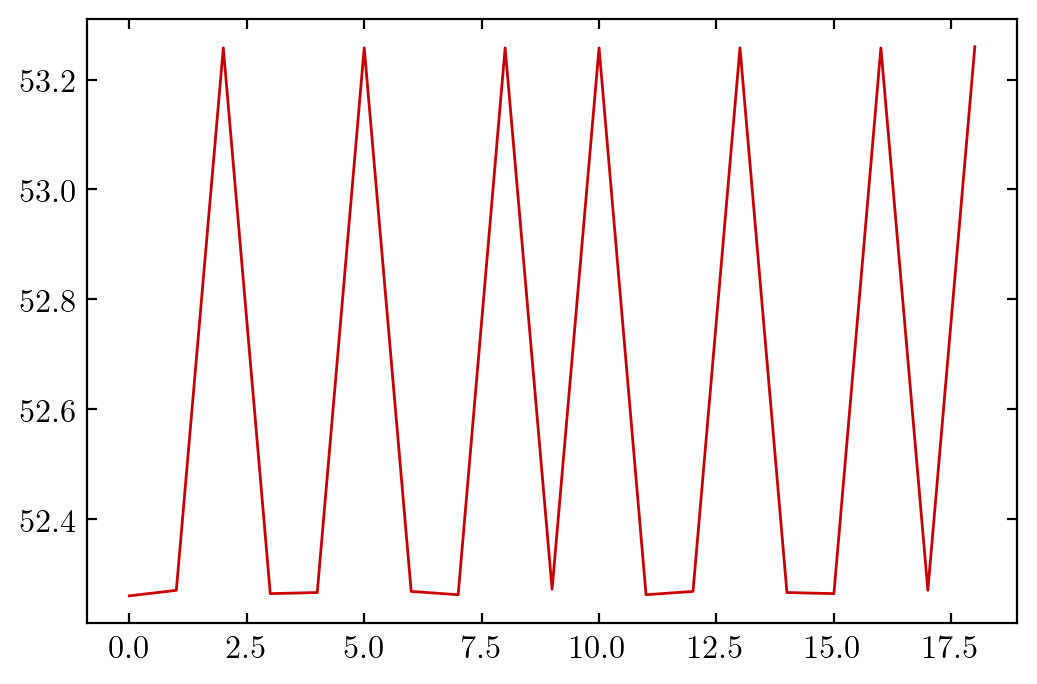

In [44]:
def smooth_particles_over_cells(particles, cell_boundaries):
    assert max(particles) < max(cell_boundaries)
    n_res = len(cell_boundaries) - 1
    res = np.zeros(n_res)
    
    idx = (particles // cell_boundaries[1]).astype(np.int)
    frac = (particles % cell_boundaries[1]) / cell_boundaries[1]
    
    frac_in_cell = 1 - 2 * abs(frac - 0.5)
    frac_nextdoor = 1 - frac_in_cell
    
    for i in range(len(idx)):
        res[idx[i]] += frac_in_cell[i]
        if frac[i] > 0.5:
            res[(idx[i] + 1) % n_res] += frac_nextdoor[i]
        else:
            res[(idx[i] - 1) % n_res] += frac_nextdoor[i]
    return res

plt.plot(smooth_particles_over_cells(np.linspace(0, 1, 1000, endpoint=False), np.linspace(0, 1, 20)))

# Perfectly smooth particle distribution

In [59]:
n_part = 20
x = np.linspace(0.025, 0.975, n_part)
cell_boundaries = np.linspace(0, 1, 11)
print(x)
print(cell_boundaries)
cic = smooth_particles_over_cells(x, cell_boundaries)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [57]:
fft = np.fft.fft(cic)

In [61]:
# Remember that the real part of the first element is just the number of particles
assert fft[0].real == n_part


# Old

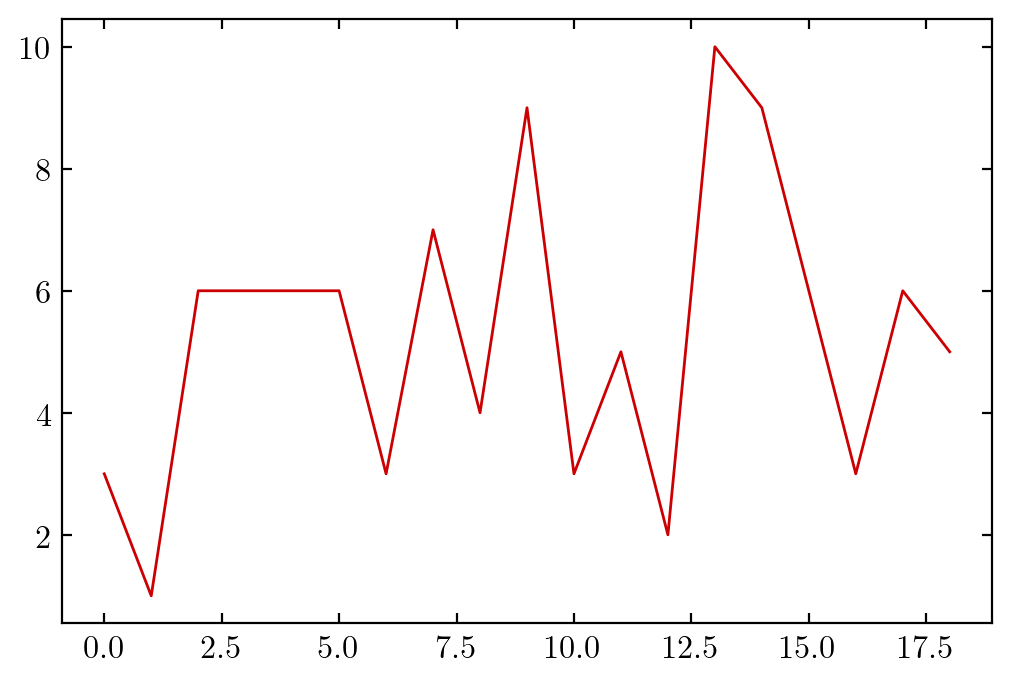

In [14]:
x = np.random.random(100)
cells = np.linspace(0, 1, 20)
cic, _ = np.histogram(x, cells)

_, ax = plt.subplots()
ax.plot(cic)

In [15]:
np.fft.fft(cic)

array([100.         +0.j        ,  -6.29491542 +3.99722551j, -11.5592287  +0.15963253j,  -3.76001483 -7.25637837j,   4.47797436+15.98149265j,  -9.33380642 +6.69592864j,  -3.05393247 -1.0787365j ,   0.38356739 +1.93495747j,   3.10003376 +7.78013495j,   4.54032233-15.95023129j,   4.54032233+15.95023129j,   3.10003376 -7.78013495j,   0.38356739 -1.93495747j,  -3.05393247 +1.0787365j ,  -9.33380642 -6.69592864j,   4.47797436-15.98149265j,  -3.76001483 +7.25637837j, -11.5592287  -0.15963253j,  -6.29491542 -3.99722551j])